In [1]:
import cv2
import numpy as np
import math as m
import random
import matplotlib.pyplot as plt

## Question 1 : Otsu Thresholding

In [207]:
image_1=cv2.imread("palmleaf1.pgm",0)
image_2=cv2.imread("palmleaf2.pgm",0)



In [208]:
def otsu(image):
    size = image.reshape(-1).shape[0]
    mean_weight = 1.0/size
    pixel, frequency = np.unique(image, return_counts=True)# Building the histogram
    
    final_thresh = 0
    final_value = 0
    intensity_arr = np.arange(pixel.shape[0])
    for t in pixel[1:-1]: 
        w_1 = np.sum(frequency[:t])
        w_2 = np.sum(frequency[t:])
        W_1 = w_1 /size
        W_2 = w_2 /size
        
        mean_1 = np.sum(intensity_arr[:t]*frequency[:t]) / float(w_1)
        mean_2 = np.sum(intensity_arr[t:]*frequency[t:]) / float(w_2)
        
        value = W_1 * W_2 * (mean_1 - mean_2) ** 2 #Between class variance. Not directly taught in class but 
                                                   #was given as an exercise

        if value > final_value: #Finding the threshold value that gives maximum betrween class variance.
            final_thresh = t
            final_value = value
    final_img = image.copy()
    
    final_img[image > final_thresh] = 255
    final_img[image < final_thresh] = 0
    final_img
    
    return final_img

/tmp/ipykernel_5152/620490640.py:16: RuntimeWarning: invalid value encountered in true_divide
  mean_2 = np.sum(intensity_arr[t:]*frequency[t:]) / float(w_2)


Text(0.5, 1.0, 'Palmleaf2 after Otsu thresholding')

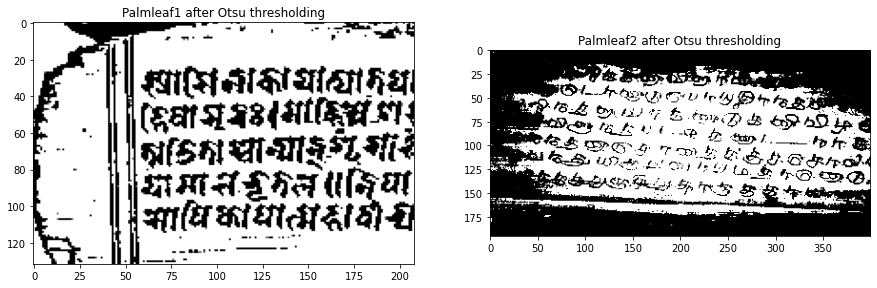

In [209]:
final_1=otsu(image_1)
final_2=otsu(image_2)
fig = plt.figure(figsize=(15,10))
fig.add_subplot(1, 2, 1)
plt.imshow(final_1,cmap='gray')
plt.title("Palmleaf1 after Otsu thresholding")
fig.add_subplot(1, 2, 2)
plt.imshow(final_2,cmap='gray')
plt.title("Palmleaf2 after Otsu thresholding")

(array([0., 0., 0., 1., 2., 4., 4., 3., 2., 1., 2., 2., 0., 0., 1., 1., 1.,
        1., 0., 1., 3., 0., 2., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0.,
        0., 0., 1., 2., 1., 0., 0., 0., 2., 2., 1., 0., 3., 1., 1., 1., 0.,
        1., 0., 2., 4., 1., 2., 2., 2., 2., 3., 3., 3., 2., 2., 4., 5., 4.,
        5., 5., 1., 6., 1., 2., 2., 5., 2., 0., 2., 1., 2., 1., 5., 1., 3.,
        4., 1., 2., 1., 1., 2., 1., 0., 2., 1., 3., 2., 1., 0., 1., 0., 2.,
        0., 3., 0., 1., 2., 0., 2., 1., 1., 1., 2., 0., 1., 0., 1., 2., 0.,
        1., 0., 2., 0., 0., 0., 0., 0., 2., 2., 0., 1., 0., 0., 0., 0., 0.,
        0., 2., 0., 2., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
        0., 2., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 2., 0.,
        0., 0., 0., 1., 0., 0., 0., 2., 0., 0., 1., 0., 0., 0., 1., 0., 3.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 2.,
        0., 

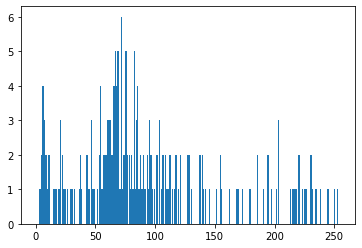

In [211]:
pixel, frequency = np.unique(image_1, return_counts=True)
plt.hist(frequency,pixel)

(array([0., 3., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]),
 array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
    

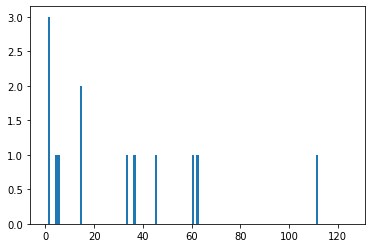

In [137]:
pixel, frequency = np.unique(image_2, return_counts=True)
plt.hist(frequency,pixel)

## K-means Clustering

In [2]:
car=cv2.imread("car.ppm")
flower=cv2.imread("flower.png")

In [3]:

def euclidean_distance(x1, x2):
    
    return np.linalg.norm(x1-x2)

class KMeans():
    def __init__(self, K=3, max_iters=100):
        self.K = K
        self.max_iters = max_iters
        
        
        self.clusters = [[] for _ in range(self.K)]
        
        self.centroids = []
    def predict(self, X,que):
        self.X = X
        self.n_samples, self.n_features = X.shape
        
        # initializing
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        
        if que==True:
            self.centroids=[[255,0,0],[0,0,0],[255,255,255]]
        if que==False:    
            self.centroids = [self.X[idx] for idx in random_sample_idxs]
            
        # Optimizing clusters
        for _ in range(self.max_iters):
           
            self.clusters = self._create_clusters(self.centroids)
            
            
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)
            
            
            if self._is_converged(centroids_old, self.centroids):
                break
            
        
        return self._get_cluster_labels(self.clusters)
    def _get_cluster_labels(self, clusters):
        
        labels = np.empty(self.n_samples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_index in cluster:
                labels[sample_index] = cluster_idx
        return labels
    def _create_clusters(self, centroids):
        # Assign the samples to the closest centroids to create clusters
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters
    def _closest_centroid(self, sample, centroids):
        
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_index = np.argmin(distances)
        return closest_index
    def _get_centroids(self, clusters): #Updating the centroids
        
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids
    def _is_converged(self, centroids_old, centroids):
        # distances between each old and new centroids, for all centroids
        distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
        return sum(distances) == 0
    
    def cent(self):
        return self.centroids


In [4]:
def segmented_image(input_image,que):
    pixel_values = input_image.reshape((-1, 3))
    pixel_values = np.float32(pixel_values)
    k = KMeans(K=3, max_iters=30)  
    y_pred = k.predict(pixel_values,que)
    print(k.cent())
    y_pred = y_pred.astype(int)
    np.unique(y_pred)
    centers = np.uint8(k.cent())
    labels = y_pred.flatten()
    segmented_image = centers[labels.flatten()]
    segmented_image = segmented_image.reshape(input_image.shape)
    plt.figure(figsize=(10, 10)) 
    plt.imshow(segmented_image)
    return 0
    

In [28]:
pixel_values = car.reshape((-1, 3))
pixel_values = np.float32(pixel_values)
k = KMeans(K=3, max_iters=5)  
y_pred = k.predict(pixel_values,True)

In [29]:
centers = np.uint8(k.cent())
centers

array([[ 94,  92, 179],
       [ 29,  25,  59],
       [250, 250, 250]], dtype=uint8)

In [30]:
y_pred = y_pred.astype(int)
np.unique(y_pred)

array([0, 1, 2])

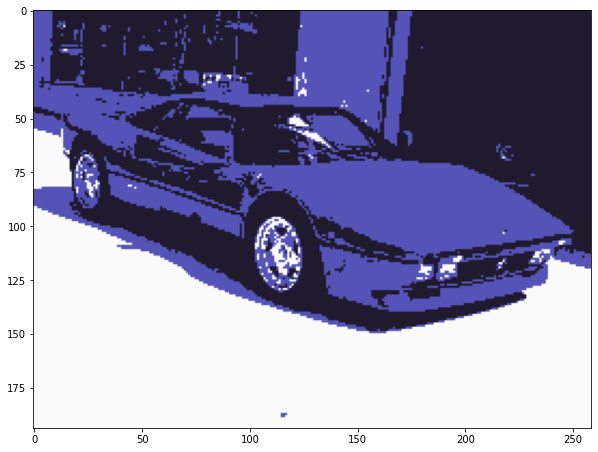

In [31]:
plt.figure(figsize=(10, 10)) 
plt.imshow(segmented_image)

In [16]:
pixel_values = flower.reshape((-1, 3))
pixel_values = np.float32(pixel_values)
k = KMeans(K=3, max_iters=5)  
y_pred = k.predict(pixel_values,False)

In [22]:
labels = y_pred.flatten()
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(flower.shape)

In [7]:
centers = np.uint8(k.cent())
centers

array([[ 36,   8, 190],
       [253, 254, 254],
       [ 44, 138, 106]], dtype=uint8)

In [8]:
y_pred = y_pred.astype(int)
np.unique(y_pred)

array([0, 1, 2])

In [9]:
labels = y_pred.flatten()
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(flower.shape)

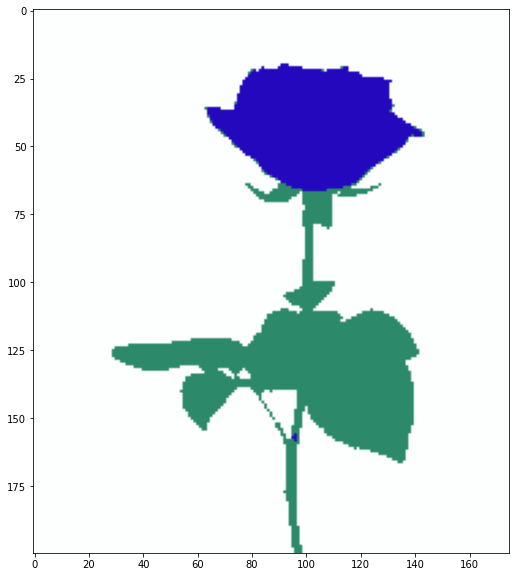

In [10]:
plt.figure(figsize=(10, 10)) 
plt.imshow(segmented_image)